# Goal
Take rows (all mal + twice num Benign)

SVM all features and find coeffs

take all +ve and -Ve coeffs

Sum by col

    take col if it appears a certain number of times

Find num ben_cols and mal_cols.
    
    Balance them to an extent => based on lowest appearances

# Load Data and conv as NP Arrays

In [1]:
import json

In [2]:
with open("./AZ_DATA/apg-X.json", 'rt') as f:
    X_org = json.load(f)
with open("./AZ_DATA/apg-y.json", 'rt') as f:
    y_org = json.load(f)
with open("./AZ_DATA/apg-meta.json", 'rt') as f:
    meta_org = json.load(f)

In [3]:
from sklearn.feature_extraction import DictVectorizer

In [4]:
vec = DictVectorizer()
X_full = vec.fit_transform(X_org)
y_full = y_org
featureList_org = vec.get_feature_names()
len(featureList_org)

1537062

In [5]:
import numpy as np

In [6]:
y_full = np.asarray(y_full).reshape(-1,1)

In [7]:
np.unique(y_full,return_counts=True)

(array([0, 1]), array([135859,  15778], dtype=int64))

In [8]:
X_full.shape

(151637, 1537062)

In [9]:
meta_org = np.asarray(meta_org).reshape(-1,1)[:,0]

In [10]:
print(print(meta_org[0]))
print(featureList_org[0:10])

{'sha256': '0000003B455A6C7AF837EF90F2EAFFD856E3B5CF49F5E27191430328DE2FA670', 'sha1': '9C14D537A7ADB4CFC43D291352F73E05E0CCDD4A', 'md5': '3EDFC78AB53521942798AD551027D04F', 'dex_date': 1459879126, 'apk_size': 10386469, 'pkg_name': 'com.zte.bamachaye', 'vercode': '121', 'vt_detection': 0, 'vt_scan_date': 1466004404, 'dex_size': 4765888, 'markets': 'anzhi', 'dex_date_quarter': '2016-Q2', 'user_id': 1, 'sample_path': '/media/nas/datasets/android/samples/Androzoo/0/0/0/0000003B455A6C7AF837EF90F2EAFFD856E3B5CF49F5E27191430328DE2FA670.apk', 'submission_date': 1519654338, 'tags': ['androzoo', '2016-h1'], 'analysis_engines': ['drebin'], 'year': 2016, 'month': 4, 'day': 5}
None
['activities::#1 Password Generator', 'activities::#Trend', 'activities::$$Classpath:android_alibaba_image_base_ImageUtilInterface', 'activities::$$Classpath:com_alibaba_intl_android_attach_base_AttachManagerInterface', 'activities::$$Classpath:com_alibaba_intl_android_i18n_base_LanguageInterface', 'activities::$Viewer'

# Select Data

In [11]:
ben = []
mal = []
for i in range(len(y_full)):
    if y_full[i]==0:
        ben.append(i)
    else:
        mal.append(i)
print(len(ben),len(mal))

135859 15778


### Select Random ChosenNumber Malware rows and 2xChosenNumber Benign rows

In [12]:
ChosenNumber = 5000

In [13]:
import random

In [14]:
mal_list = []
mal_list = random.sample(mal,ChosenNumber)
mal_list[:5]

[66527, 113950, 64906, 3341, 114672]

In [15]:
ben_list = []
ben_list = random.sample(ben,2*ChosenNumber)
ben_list[:5]

[81853, 131023, 64898, 145484, 67179]

In [16]:
chosen = mal_list + ben_list
chosen.sort()
X = X_full[chosen]
y = y_full[chosen]
meta = meta_org[chosen]
print(X.shape,y.shape,meta.shape)
print(np.unique(y,return_counts=True))

(15000, 1537062) (15000, 1) (15000,)
(array([0, 1]), array([10000,  5000], dtype=int64))


# SVM

# Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
import random

In [18]:
random_state = random.randint(0, 1000)

In [19]:
train_idxs, test_idxs = train_test_split(
            range(X.shape[0]),
            stratify=y,
            test_size=0.33333,
            random_state=random_state)

In [20]:
print(len(train_idxs),len(test_idxs))

10000 5000


In [21]:
X_train1 = X[train_idxs]
X_test1 = X[test_idxs]
y_train1 = y[train_idxs]
y_test1 = y[test_idxs]
m_train1 = [meta[i] for i in train_idxs]
m_test1 = [meta[i] for i in test_idxs]

In [22]:
X_train1.shape

(10000, 1537062)

In [23]:
y_train1.shape

(10000, 1)

In [24]:
print(np.unique(y_train1,return_counts=True))

(array([0, 1]), array([6667, 3333], dtype=int64))


In [25]:
print(np.unique(y_test1,return_counts=True))

(array([0, 1]), array([3333, 1667], dtype=int64))


# Linear SVC to find ben and Mal Rows

In [26]:
from sklearn.svm import LinearSVC

In [27]:
selector = LinearSVC(C=2)
selector.fit(X, y)

C:\Users\Pitch\.conda\envs\tf1-gpu\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Pitch\.conda\envs\tf1-gpu\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=2)

In [28]:
len(y)

15000

In [29]:
selector

LinearSVC(C=2)

In [30]:
cols1 = np.argsort(selector.coef_[0])[::-1]
p = n = z = 0
cols2 = []
for i in cols1:
    if selector.coef_[0][i] < 0:
        n+=1
        cols2.append(i)
    elif selector.coef_[0][i] > 0:
        p+=1
        cols2.append(i)
    else:
        z+=1
print(p,n,z)
print(len(cols2))

46286 42608 1448168
88894


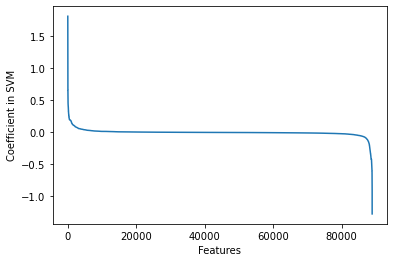

In [31]:
import matplotlib.pyplot as plt
plt.xlabel("Features")
plt.ylabel("Coefficient in SVM")
plt.plot(selector.coef_[0][cols2])

### removing all cols from xtrain and xtest if they are 0 contrib

In [32]:
X_train2 = X_train1[:,cols2]
X_test2 = X_test1[:,cols2]
y_train2 = y_train1
y_test2 = y_test1
m_train2 = m_train1
m_test2 = m_test1
coeff2 = selector.coef_[0][cols2]
featureList2 = []
for i in cols2:
    featureList2.append(featureList_org[i])
print(X_train2.shape,X_test2.shape,len(coeff2))
coeff2

(10000, 88894) (5000, 88894) 88894


array([ 1.81633664,  1.44988888,  1.38428774, ..., -0.90651226,
       -0.91097974, -1.27331342])

In [33]:
FC = X[:,cols2].sum(axis=0).reshape(-1,1)
print(FC.shape)
C = 0
LOF1 = []
for i in range(len(FC)):
    if FC[i][0] > 50: #guess
        C+=1
        LOF1.append(i)
print(len(LOF1))

(88894, 1)
2316


In [34]:
import math
nLOF = int((math.sqrt(len(LOF1))))
numLOF = nLOF * nLOF 
LOF = LOF1[:numLOF]
len(LOF)

2304

In [35]:
X_train = X_train2[:,LOF]
X_test = X_test2[:,LOF]
y_train = y_train2
y_test = y_test2
m_train = m_train2
m_test = m_test2
featureList3 = []
for i in LOF:
    featureList3.append(featureList2[i])
coeff3 = coeff2[LOF]
print(X_train.shape,X_test.shape,len(coeff3))
coeff3

(10000, 2304) (5000, 2304) 2304


array([ 0.87980025,  0.87236088,  0.70979789, ..., -0.46716534,
       -0.48223021, -0.48506692])

In [36]:
p = n = 0
for i in coeff3:
    if i > 0:
        p+=1
    else:
        n+=1
print(p,n)

1329 975


In [37]:
p+n

2304

Save these

HAD TO GO FOR SCIPY SPARSE ARRAY FOR CONVERTING TO ARRAY FOR SAVING X TRAIN N TEST

In [38]:
import scipy

In [39]:
X_train_S = scipy.sparse.csr_matrix.toarray(X_train)
X_test_S = scipy.sparse.csr_matrix.toarray(X_test)

# Reshape XTRAIN AND XTEST 
# Also reshape coeff and feats

In [40]:
X_train_S = X_train_S.reshape(-1,nLOF,nLOF)
X_test_S = X_test_S.reshape(-1,nLOF,nLOF)
print(X_train_S.shape,X_test_S.shape)

(10000, 48, 48) (5000, 48, 48)


In [41]:
coeff3 = np.array(coeff3)
coeff3 = coeff3.reshape(nLOF,nLOF)
coeff3.shape

(48, 48)

In [42]:
featureList3 = np.array(featureList3)
featureList3 = featureList3.reshape(nLOF,nLOF)
featureList3.shape

(48, 48)

In [43]:
np.save('./DATA/X_train.npy',X_train_S)
np.save('./DATA/X_test.npy',X_test_S)

np.save('./DATA/y_train.npy',y_train)
np.save('./DATA/y_test.npy',y_test)

np.save('./DATA/meta_train.npy',m_train)
np.save('./DATA/meta_test.npy',m_test)

np.save('./DATA/coeff_features.npy',coeff3)

np.save('./DATA/FeatureList.npy',featureList3)

np.save('./DATA/chosenRows.npy',np.array(chosen))

In [44]:
print("DONE")

DONE


In [45]:
np.load('./DATA/FeatureList.npy').shape

(48, 48)

# TO WRITE

Very similar to linear feature selection.

But we only take 5000 random MAL and 10k BEN

Reason why we take just 5k is to have a smaller dataset for easier working given that time constraint was big

Major DIFF in Cell 33 and 34

I find 2316 features that appear atleast 50 times in this 15k rows.

I sqrt that to get 48.___ . So i take the first 48squared i.e 2304 features alone so I can get a perfect square for an image and drop the remaining 12 features.

I save as 3d numpy array with 1st index showing row num and corresponding 2D array being the 48x48 numpy array of APK features.